# Assignment 5
## Gal Dali

### Question 1

#### 1.1 Warm up
$$\dot{y} = y$$
$$y(0) = 1$$
$$t = [0, 2]$$

In [20]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

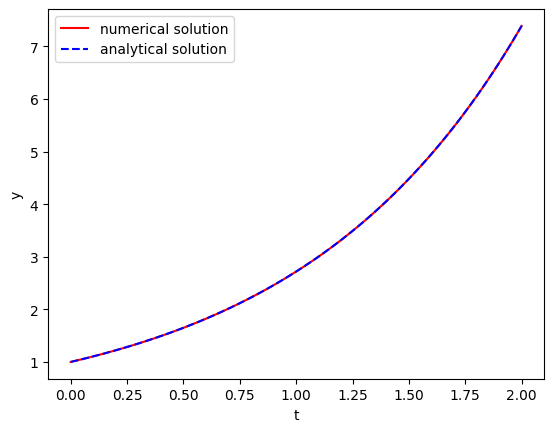

In [21]:
def y_dot(t, y):
    return y


y0 = [1]

# solve the ode
t_span = [0, 2]
t_eval = np.linspace(t_span[0], t_span[1], 100)
sol = solve_ivp(y_dot, t_span, y0, t_eval=t_eval, method='RK45')

# plot the solution in red and the analytical solution in blue
plt.plot(t_eval, sol.y[0], 'r', label='numerical solution')
plt.plot(t_eval, np.exp(t_eval), 'b--', label='analytical solution')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

#### 1.2 Lotka - Volterra

$ x(t) = \text{ number of rabbits}$  
$ y(t) = \text{ number of foxes}$

$ \dot x = ax - bxy$  
$ \dot y  = -cy + dxy$

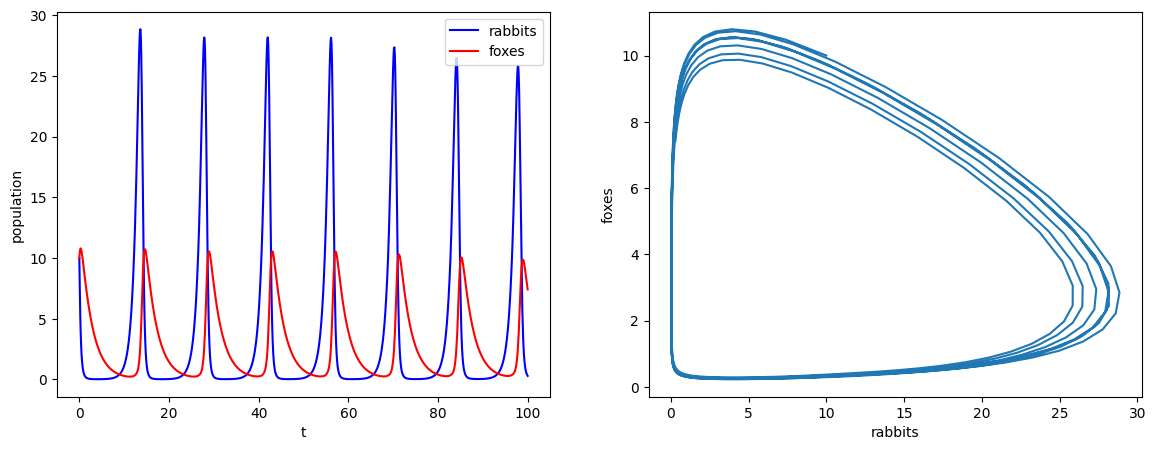

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


def lotka_volterra(t, z, a, b, c, d):
    x, y = z
    return [a * x - b * x * y, -c * y + d * x * y]


# initial conditions
a = 1.1
b = 0.4
c = 0.4
d = 0.1
y0 = 10
x0 = 10
t_eval = np.linspace(0, 100, 1000)

# solve the ode
sol = solve_ivp(lotka_volterra, [0, 100], [x0, y0], t_eval=t_eval, args=(a, b, c, d), method='RK45')

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# plot the solution of foxes and rabbits in the same graph
ax1.plot(t_eval, sol.y[0], 'b', label='rabbits')
ax1.plot(t_eval, sol.y[1], 'r', label='foxes')
ax1.set_xlabel('t')
ax1.set_ylabel('population')
ax1.legend()

# plot the solution as a phase plot (foxes vs. rabbits)
ax2.plot(sol.y[0], sol.y[1])
ax2.set_xlabel('rabbits')
ax2.set_ylabel('foxes')

plt.show()

### Question 2

#### Pythagorean Three Body Problem

### Verlet-Stormer Method

$$ \ddot{y} = A(y)$$

1. calculate the first step using Euler: $y_1 = y_0 + h * v_0$  
2. From then on, use the following equation: $y_{i+1} = 2y_i + h^2 * A(y_i) - y_{i-1}$


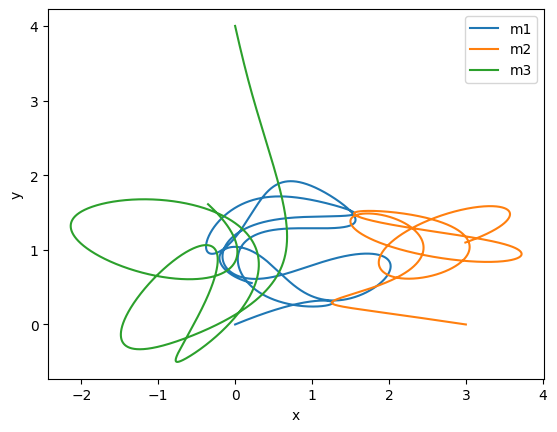

In [23]:
import numpy as np

# masses
m1 = 5
m2 = 4
m3 = 3
mass_vec = np.array([m1, m2, m3], dtype=int)

# gravitational constant
G = 1

# initial positions
pos1 = (0, 0)
pos2 = (3, 0)
pos3 = (0, 4)
pos_vec = np.array([pos1, pos2, pos3], dtype=float)

# initial velocities
v1_0 = (0, 0)
v2_0 = (0, 0)
v3_0 = (0, 0)
vel_vec = np.array([v1_0, v2_0, v3_0], dtype=float)

t_span = [0, 15]
h = 1e-4 # step size
num_steps = int((t_span[1] - t_span[0]) / h)

trajectory = np.zeros((num_steps, len(pos_vec), 2))
trajectory[0] = pos_vec # initial positions

def A(m, x, y):
    """
    :param m: vector of the masses (size n)
    :param x: vector of the x positions (size n)
    :param y: vector of the y positions (size n)
    :return: the representation of the acceleration for each mass as a vector (size 2n: x and y components)
    """
    n = len(m)
    A_vector = np.zeros((n, 2))
    for i in range(n):
        for j in range(n):
            if i != j:
                A_vector[i][0] += G * m[j] * (x[j] - x[i]) / ((x[j] - x[i]) ** 2 + (y[j] - y[i]) ** 2) ** (3 / 2)
                A_vector[i][1] += G * m[j] * (y[j] - y[i]) / ((x[j] - x[i]) ** 2 + (y[j] - y[i]) ** 2) ** (3 / 2)
    return A_vector


# First step using Euler
acceleration = A(mass_vec, pos_vec[:, 0], pos_vec[:, 1])
pos_euler = pos_vec + h*vel_vec #+ 0.5*h**2 * acceleration # For some reason, adding this 0.5*h**2 * acceleration term is supposed to make the solution more accurate, but I don't think it is necessary from the explanation in the lecture
trajectory[1] = pos_euler

# Verlet-Stormer Method
prev_pos = trajectory[0]
cur_pos = trajectory[1]

for step in range(2, num_steps):
    next_pos = 2*cur_pos + h**2 * A(mass_vec, cur_pos[:, 0], cur_pos[:, 1]) - prev_pos
    trajectory[step] = next_pos
    prev_pos, cur_pos = cur_pos, next_pos
    
# plot the trajectory
plt.plot(trajectory[:, 0, 0], trajectory[:, 0, 1], label='m1')
plt.plot(trajectory[:, 1, 0], trajectory[:, 1, 1], label='m2')
plt.plot(trajectory[:, 2, 0], trajectory[:, 2, 1], label='m3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()